In [1]:
# Basic import
import os
import sys
import json
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Helper function
def writeProgress(msg, count, total):
    sys.stdout.write(msg + "{:.2%}\r".format(count/total))
    sys.stdout.flush()
    
def newPath(path):
    if not os.path.isdir(path):
        os.mkdir(path)

def read_json(src_path):
    with open(src_path, 'r') as json_file:
        data = json.load(json_file)
    return data

def write_json(data,dst_path):
    with open(dst_path, 'w') as outfile:
        json.dump(data, outfile)

def writeLog(row):
    with open('log.txt', 'a') as outfile:
        outfile.write(row + '\n')

def getErrMsg(e):
    error_class = e.__class__.__name__ #取得錯誤類型
    detail = e.args[0] #取得詳細內容
    errMsg = "[{}] {}".format(error_class, detail)
    return errMsg

In [3]:
columns = read_json('../orderdListGenres.json')
print(len(columns), columns)

20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western']


# 儲存路徑

In [4]:
norm = 'minmax'
SAVE_NAME = norm + '_1e-3_filtered'
HISTORY_SAVE = './history/' + SAVE_NAME + '.csv'
WEIGHTS_SAVE = './weight/' + SAVE_NAME + '.h5'

# Load data

## Train valid split

In [5]:
# train_label = pd.read_csv('./csv/trainMatrix.csv')
# train_label = train_label.set_index('id')
# train_label

In [6]:
# val_label = pd.read_csv('./csv/validMatrix.csv')
# val_label = val_label.set_index('id')
# val_label

In [7]:
# test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
# test_label = test_label.set_index('filename')
# test_label

In [8]:
# train_data = pd.read_csv('./csv/computed_' + norm + '_2018.csv')
# train_data = train_data.set_index('Movie')
# train_data

In [9]:
# train_data["C_avg_norm"] = train_data["C_avg_norm"]*0.1
# train_data["C_std_norm"] = train_data["C_std_norm"]*0.1
# train_data["D_avg_norm"] = train_data["D_avg_norm"]*0.1
# train_data["D_std_norm"] = train_data["D_std_norm"]*0.1
# train_data

In [10]:
# test_data = pd.read_csv('./csv/computed_' + norm + '_2019.csv')
# test_data = test_data.set_index('Movie')
# test_data

In [11]:
# test_data["C_avg_norm"] = test_data["C_avg_norm"]*0.1
# test_data["C_std_norm"] = test_data["C_std_norm"]*0.1
# test_data["D_avg_norm"] = test_data["D_avg_norm"]*0.1
# test_data["D_std_norm"] = test_data["D_std_norm"]*0.1
# test_data

In [12]:
# val_data = train_data.loc[val_label.index, :]
# train_data = train_data.drop(val_label.index)
# print(train_data.shape, val_data.shape, test_data.shape)
# print(train_label.shape, val_label.shape, test_label.shape)

In [13]:
# train_x = train_data.iloc[:, 8:].to_numpy()
# val_x = val_data.iloc[:, 8:].to_numpy()
# test_x = test_data.iloc[:, 8:].to_numpy()

# train_y = train_label.to_numpy()
# val_y = val_label.to_numpy()
# test_y = test_label.to_numpy()

# print(train_x.shape, train_y.shape)
# print(val_x.shape, val_y.shape)
# print(test_x.shape, test_y.shape)

## Random split valid

In [14]:
train_data = pd.read_csv('./csv/computed_minmaxnorm_2018_filtered.csv')
train_data = train_data.set_index('Movie')
train_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_minmaxnorm,A_std_minmaxnorm,B_avg_minmaxnorm,B_std_minmaxnorm,C_avg_minmaxnorm,C_std_minmaxnorm,D_avg_minmaxnorm,D_std_minmaxnorm
Movie,,,,,,,,,,,,,,,,
tt0328810,74.324324,77.632556,7.429596e+06,6.754840e+06,0.336424,0.335943,8309.913009,4659.362101,0.047121,0.037375,0.007537,0.000935,0.424876,0.817968,0.794498,0.747546
tt10005184,128.111111,168.813141,1.056263e+06,2.578889e+06,0.099732,0.170803,5180.699115,2028.150559,0.096247,0.088370,0.001071,0.000357,0.099603,0.372418,0.487130,0.290240
tt10017502,31.970588,14.597512,3.220428e+06,6.070315e+06,0.268349,0.325218,3663.755048,2106.268326,0.008437,0.002121,0.003267,0.000840,0.331324,0.789032,0.338127,0.303817
tt10043732,41.670732,28.350616,5.971663e+06,1.710160e+07,0.315923,0.330436,4184.885640,3340.768941,0.017297,0.009813,0.006058,0.002368,0.396702,0.803111,0.389316,0.518374
tt10048096,28.480000,27.728859,1.167823e+07,2.226350e+07,0.296425,0.314294,4229.213104,2424.473662,0.005249,0.009465,0.011846,0.003083,0.369907,0.759558,0.393670,0.359121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,140.034483,81.652114,1.034090e+06,2.018781e+06,0.115961,0.170274,5452.573097,3761.139541,0.107137,0.039623,0.001049,0.000280,0.121906,0.370990,0.513835,0.591434
tt9879080,83.636364,51.821850,1.771188e+06,2.408702e+06,0.058649,0.080815,1852.817936,1417.178866,0.055626,0.022940,0.001797,0.000334,0.043146,0.129630,0.160247,0.184053
tt9891764,32.716981,19.979119,7.569638e+06,1.308621e+07,0.243142,0.287351,4391.310240,2942.670602,0.009119,0.005131,0.007679,0.001812,0.296684,0.686867,0.409592,0.449184


In [15]:
train_label = pd.read_csv('./csv/filename2genreMat_2018.csv')
train_label = train_label.set_index('id')
train_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,
tt0328810,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
tt10005184,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
tt10017502,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
tt10043732,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
tt10048096,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tt9866700,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
tt9879080,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
tt9891764,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
test_data = pd.read_csv('./csv/computed_minmaxnorm_2019.csv')
test_data = test_data.set_index('Movie')
test_data

,A_avg,A_std,B_avg,B_std,C_avg,C_std,D_avg,D_std,A_avg_minmaxnorm,A_std_minmaxnorm,B_avg_minmaxnorm,B_std_minmaxnorm,C_avg_minmaxnorm,C_std_minmaxnorm,D_avg_minmaxnorm,D_std_minmaxnorm
Movie,,,,,,,,,,,,,,,,
47metersdown,34.804878,23.842184,1.193778e+07,3.062201e+07,0.245609,0.249743,3832.149222,3285.912168,0.071101,0.066649,0.031572,0.040065,0.451185,0.471811,0.377956,0.831365
adogsjourneymovie,34.632479,29.109753,2.688809e+06,4.606428e+06,0.335994,0.349169,3225.348525,2086.338316,0.069522,0.097831,0.006551,0.005409,0.717482,0.871405,0.284994,0.359382
aftermathmovie,35.692308,26.611911,7.378430e+05,1.447868e+06,0.204298,0.259951,3212.997036,2613.398542,0.079233,0.083045,0.001273,0.001202,0.329474,0.512840,0.283102,0.566759
aftermovie,58.276596,54.904056,5.730162e+06,1.429929e+07,0.212974,0.231655,3180.640515,2106.905407,0.286168,0.250527,0.014779,0.018321,0.355036,0.399117,0.278145,0.367474
alitamovie,35.784314,29.192272,2.531455e+06,6.295080e+06,0.267326,0.269637,2845.366841,2350.313592,0.080076,0.098320,0.006125,0.007659,0.515171,0.551766,0.226780,0.463246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,43.010204,52.851833,2.255390e+06,6.467894e+06,0.175808,0.220674,3444.948763,3236.149083,0.146285,0.238378,0.005378,0.007889,0.245535,0.354984,0.318637,0.811786
whatmenwant,32.086957,19.626320,2.003662e+07,5.276056e+07,0.241500,0.260970,6006.485656,2582.258884,0.046198,0.041692,0.053481,0.069556,0.439081,0.516934,0.711067,0.554507
wonderparkmovie,27.282443,13.193380,1.579958e+08,4.421705e+08,0.431886,0.331712,5554.107410,2757.092203,0.002175,0.003610,0.426699,0.588297,1.000000,0.801244,0.641762,0.623296


In [17]:
test_label = pd.read_csv('./csv/filename2genreMat_2019.csv')
test_label = test_label.set_index('filename')
test_label

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
train_label = train_label.loc[train_data.index, :]
train_label.to_csv('./csv/train_label_2018_filtered.csv', index = 0)

In [19]:
print(train_data.shape,test_data.shape)
print(train_label.shape,test_label.shape)
# print(train_data.isnull().sum())
# print(test_data.isnull().sum())

(1320, 16) (97, 16)
(1320, 20) (97, 20)


In [20]:
val_data = train_data.sample(frac = 0.2,random_state = 42)
train_data = train_data.drop(val_data.index)
print(train_data.shape, val_data.shape)

(1056, 16) (264, 16)


In [21]:
val_label = train_label.loc[val_data.index, :]
train_label = train_label.drop(val_data.index)
print(train_label.shape, val_label.shape)

(1056, 20) (264, 20)


In [22]:
train_x = train_data.iloc[:, 8:].to_numpy()
val_x = val_data.iloc[:, 8:].to_numpy()
test_x = test_data.iloc[:, 8:].to_numpy()

train_y = train_label.to_numpy()
val_y = val_label.to_numpy()
test_y = test_label.to_numpy()

print(train_x.shape, train_y.shape)
print(val_x.shape, val_y.shape)
print(test_x.shape, test_y.shape)

(1056, 8) (1056, 20)
(264, 8) (264, 20)
(97, 8) (97, 20)


# Model start

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape = (8, )))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(20, activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                180       
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [25]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

adam = Adam(lr=1e-3)

model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['acc'])

callbacks = [EarlyStopping(monitor='val_loss')]

history = model.fit(train_x, train_y, 
                    batch_size=32, epochs=100, verbose=1, 
                    validation_data=(val_x, val_y), 
                    callbacks=callbacks)

Instructions for updating:
Use tf.cast instead.
Train on 1056 samples, validate on 264 samples
Epoch 1/100
1056/1056 [==============================] - 0s 228us/step - loss: 0.6631 - acc: 0.6441 - val_loss: 0.6463 - val_acc: 0.6824
Epoch 2/100
1056/1056 [==============================] - 0s 47us/step - loss: 0.6302 - acc: 0.7195 - val_loss: 0.6154 - val_acc: 0.7434
Epoch 3/100
1056/1056 [==============================] - 0s 47us/step - loss: 0.6003 - acc: 0.7775 - val_loss: 0.5874 - val_acc: 0.8027
Epoch 4/100
1056/1056 [==============================] - 0s 46us/step - loss: 0.5732 - acc: 0.8295 - val_loss: 0.5620 - val_acc: 0.8678
Epoch 5/100
1056/1056 [==============================] - 0s 46us/step - loss: 0.5487 - acc: 0.8809 - val_loss: 0.5390 - val_acc: 0.8864
Epoch 6/100
1056/1056 [==============================] - 0s 47us/step - loss: 0.5265 - acc: 0.8884 - val_loss: 0.5183 - val_acc: 0.8869
Epoch 7/100
1056/1056 [==============================] - 0s 48us/step - loss: 0.5066 - a

In [26]:
# save model weights
model.save(WEIGHTS_SAVE)

In [27]:
# save history
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

his_df = pd.DataFrame(data = {
    'Epoch' : epochs,
    'Loss' : loss,
    'Acc' : acc,
    'Val_loss' : val_loss,
    'Val_acc' : val_acc
})
his_df = his_df[['Epoch', 'Loss', 'Acc', 'Val_loss', 'Val_acc']]
his_df.to_csv(HISTORY_SAVE, index = False)

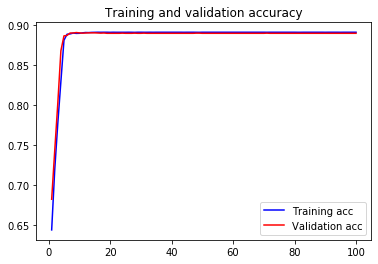

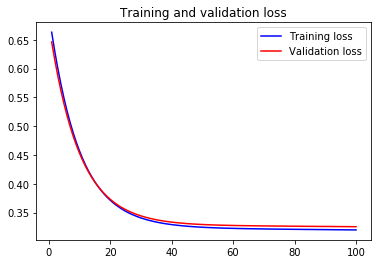

In [28]:
# 繪製結果
import matplotlib.pyplot as plt

# plt.figure()

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing

In [29]:
pred = model.predict(test_x, verbose = 1)

97/97 [==============================] - 0s 115us/step


In [30]:
pred.shape

(97, 20)

In [31]:
results = pd.DataFrame(pred, columns=columns)
results["username"] = test_data.index
ordered_cols = ["username"] + columns
results = results[ordered_cols] #To get the same column order
results.to_csv("./output/"+ SAVE_NAME + "_result.csv",index=False)

In [32]:
results

,username,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.150965,0.072380,0.057931,0.052138,0.142981,0.070146,0.042277,0.450197,0.058405,...,0.055515,0.087863,0.051688,0.055523,0.076830,0.038192,0.039737,0.094970,0.048742,0.045420
1,adogsjourneymovie,0.131864,0.063790,0.042010,0.055577,0.138815,0.066397,0.041297,0.477837,0.039285,...,0.064015,0.060555,0.049570,0.042691,0.075411,0.046627,0.044495,0.099735,0.056462,0.055454
2,aftermathmovie,0.163372,0.090084,0.070917,0.079416,0.161537,0.098262,0.063133,0.476847,0.071951,...,0.083899,0.108502,0.077226,0.078045,0.098777,0.060150,0.059022,0.128091,0.077772,0.071038
3,aftermovie,0.133461,0.080559,0.060446,0.089953,0.137722,0.097695,0.086707,0.461326,0.060497,...,0.076642,0.094567,0.088209,0.085483,0.091224,0.057281,0.050515,0.124809,0.080048,0.072684
4,alitamovie,0.159595,0.085765,0.061877,0.074454,0.161230,0.090888,0.061803,0.472423,0.063530,...,0.085913,0.095753,0.072247,0.071949,0.097349,0.060085,0.056953,0.128243,0.074943,0.072525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.151939,0.070721,0.057853,0.062609,0.132438,0.093196,0.058825,0.465980,0.061178,...,0.063039,0.105486,0.068393,0.081094,0.078756,0.043134,0.036687,0.109427,0.063445,0.055089
93,whatmenwant,0.126955,0.089700,0.063286,0.056951,0.152553,0.060898,0.047377,0.428414,0.060934,...,0.047419,0.072258,0.047723,0.041329,0.092339,0.043268,0.051285,0.078222,0.046236,0.037709
94,wonderparkmovie,0.091748,0.062711,0.061817,0.024886,0.176911,0.016120,0.017476,0.242368,0.024428,...,0.013454,0.017061,0.019969,0.006325,0.037216,0.014971,0.033777,0.013674,0.009381,0.011199
95,xmenmovies,0.141579,0.071797,0.048928,0.062532,0.143785,0.074840,0.053738,0.463812,0.049898,...,0.071255,0.076441,0.059830,0.058759,0.083620,0.049008,0.045791,0.113492,0.061460,0.061446


## Label top n dynamic

In [33]:
true_df = test_label
true_df

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
filename,,,,,,,,,,,,,,,,,,,,
47metersdown.mp4,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
adogsjourneymovie.mp4,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
aftermathmovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
aftermovie.mp4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
alitamovie.mp4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie.mp4,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0
whatmenwant.mp4,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
wonderparkmovie.mp4,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
results = pd.read_csv("./output/"+ SAVE_NAME + "_result.csv")
results = results.set_index('username')
results

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
username,,,,,,,,,,,,,,,,,,,,
47metersdown,0.150965,0.072380,0.057931,0.052138,0.142981,0.070146,0.042277,0.450197,0.058405,0.056053,0.055515,0.087863,0.051688,0.055523,0.076830,0.038192,0.039737,0.094970,0.048742,0.045420
adogsjourneymovie,0.131864,0.063790,0.042010,0.055577,0.138815,0.066397,0.041297,0.477837,0.039285,0.041331,0.064015,0.060555,0.049570,0.042691,0.075411,0.046627,0.044495,0.099735,0.056462,0.055454
aftermathmovie,0.163372,0.090084,0.070916,0.079416,0.161537,0.098262,0.063133,0.476847,0.071951,0.076760,0.083899,0.108502,0.077226,0.078045,0.098777,0.060150,0.059022,0.128091,0.077772,0.071038
aftermovie,0.133461,0.080559,0.060446,0.089953,0.137722,0.097695,0.086707,0.461326,0.060497,0.068846,0.076642,0.094567,0.088209,0.085483,0.091224,0.057281,0.050515,0.124809,0.080048,0.072684
alitamovie,0.159595,0.085765,0.061877,0.074454,0.161230,0.090888,0.061803,0.472423,0.063530,0.068777,0.085913,0.095753,0.072247,0.071949,0.097349,0.060085,0.056953,0.128243,0.074943,0.072525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
usmovie,0.151939,0.070721,0.057853,0.062609,0.132438,0.093196,0.058825,0.465980,0.061178,0.070396,0.063039,0.105486,0.068393,0.081094,0.078756,0.043134,0.036687,0.109427,0.063445,0.055089
whatmenwant,0.126955,0.089700,0.063286,0.056951,0.152553,0.060898,0.047377,0.428414,0.060934,0.044322,0.047419,0.072258,0.047723,0.041329,0.092339,0.043268,0.051285,0.078222,0.046236,0.037709
wonderparkmovie,0.091748,0.062711,0.061817,0.024886,0.176911,0.016120,0.017476,0.242368,0.024428,0.014060,0.013454,0.017061,0.019969,0.006325,0.037216,0.014971,0.033777,0.013674,0.009381,0.011199


In [35]:
labels = read_json('../genresDic.json')

In [36]:
def countAcc(predList, trueList):
    fraction = 0
    denominator = len(trueList)
    for g in predList:
        if g in trueList:
            fraction += 1 
    return fraction / denominator

In [37]:
li = []
for i, row in true_df.iterrows():
    username = i.split('.')[0]
#     if username == results.loc[i,:]['username']: # username equals
    print(i, username)
    truth = labels[username]
    numTrue = sum(row)
    print('count:', numTrue)

    s = results.loc[username,:]
    top_n = s.sort_values(ascending=False)[:numTrue]
    inList = list(top_n.index)

    onehot = []
    for g in columns:
        onehot.append(int(g in inList))

    acc = countAcc(inList, truth)
    print(acc, inList, truth)

    appList = [username, acc, truth, inList] + onehot
    li.append(appList)
        

47metersdown.mp4 47metersdown
count: 3
0.3333333333333333 ['Drama', 'Action', 'Comedy'] ['Adventure', 'Drama', 'Horror']
adogsjourneymovie.mp4 adogsjourneymovie
count: 3
0.6666666666666666 ['Drama', 'Comedy', 'Action'] ['Adventure', 'Comedy', 'Drama']
aftermathmovie.mp4 aftermathmovie
count: 3
0.3333333333333333 ['Drama', 'Action', 'Comedy'] ['Drama', 'Romance', 'War']
aftermovie.mp4 aftermovie
count: 2
0.5 ['Drama', 'Comedy'] ['Drama', 'Romance']
alitamovie.mp4 alitamovie
count: 3
0.3333333333333333 ['Drama', 'Comedy', 'Action'] ['Action', 'Adventure', 'Sci-Fi']
angelhasfallen.mp4 angelhasfallen
count: 2
0.5 ['Drama', 'Action'] ['Action', 'Thriller']
angrybirdsmovie.mp4 angrybirdsmovie
count: 3
0.6666666666666666 ['Comedy', 'Animation', 'Drama'] ['Adventure', 'Animation', 'Comedy']
annabellemovie.mp4 annabellemovie
count: 3
0.3333333333333333 ['Drama', 'Thriller', 'Comedy'] ['Horror', 'Mystery', 'Thriller']
annamovie.mp4 annamovie
count: 2
0.0 ['Drama', 'Comedy'] ['Action', 'Thriller'

In [38]:
acc_df = pd.DataFrame(li, columns = ['username', 'acc', 'truth', 'top_n'] + columns)
acc_df

,username,acc,truth,top_n,Action,Adventure,Animation,Biography,Comedy,Crime,...,History,Horror,Music,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,47metersdown,0.333333,"[Adventure, Drama, Horror]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adogsjourneymovie,0.666667,"[Adventure, Comedy, Drama]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,aftermathmovie,0.333333,"[Drama, Romance, War]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,aftermovie,0.500000,"[Drama, Romance]","[Drama, Comedy]",0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,alitamovie,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,usmovie,0.000000,"[Horror, Mystery, Thriller]","[Drama, Action, Comedy]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
93,whatmenwant,0.333333,"[Comedy, Fantasy, Romance]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
94,wonderparkmovie,0.333333,"[Adventure, Animation, Comedy]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
95,xmenmovies,0.333333,"[Action, Adventure, Sci-Fi]","[Drama, Comedy, Action]",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
acc_df.to_csv("./output/"+ SAVE_NAME + "_bi.csv", index = 0)

In [40]:
acc_df['acc'].mean()

0.4209621993127148